In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
from astroquery.mast import Observations
from astroquery.mast import Catalogs

## FFI ##

FFI's for sector 2.

In [5]:
ffiDir = '/epyc/data/tess/sector002_ffi'
ffiFiles = glob.glob(os.path.join(ffiDir, '*ffic.fits'))
len(ffiFiles), ffiFiles[0]

(19899,
 '/epyc/data/tess/sector002_ffi/tess2018235205941-s0002-2-4-0121-s_ffic.fits')

In [6]:
with fits.open(ffiFiles[0], mode = "readonly") as hdulist:
    wcs_info = WCS(hdulist[1].header)
    cal_image = hdulist[1].data
    header = hdulist[1].header
    # Use the header to determine the mid-point of the exposure time for this FFI.
    mid_time = (header['TSTOP'] + header['TSTART']) / 2

(2078, 2136)

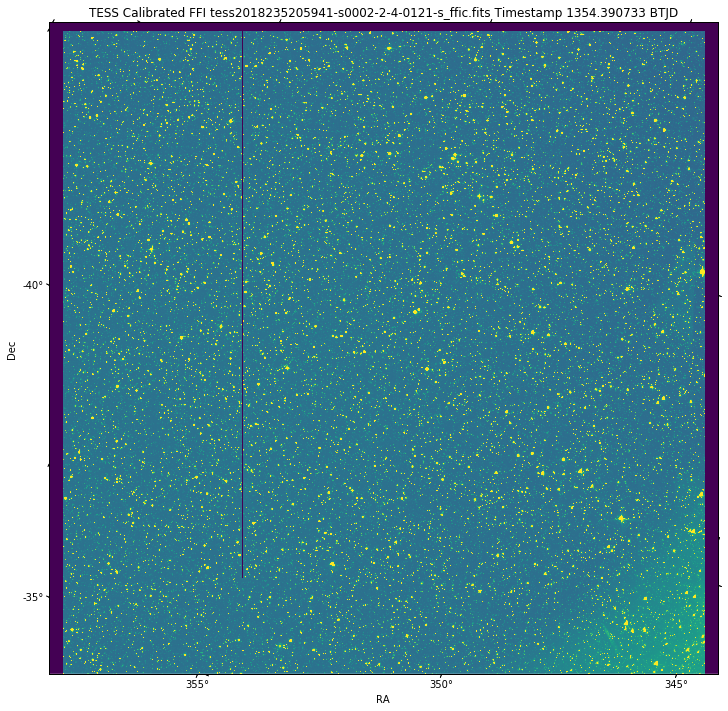

In [7]:
plt.figure(figsize = (12,12))

plt.subplot(111, projection = wcs_info)
plt.imshow(cal_image, vmin = np.percentile(cal_image,4),vmax = np.percentile(cal_image, 98),origin = "lower")
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title("TESS Calibrated FFI %s Timestamp %f BTJD" % (os.path.split(ffiFiles[0])[-1], mid_time))

cal_image.shape

In [8]:
time = np.zeros(len(ffiFiles), float)
ra = np.zeros(len(ffiFiles), float)
dec = np.zeros(len(ffiFiles), float)
telapse = np.zeros(len(ffiFiles), float)
camera = np.zeros(len(ffiFiles), int)
ccd = np.zeros(len(ffiFiles), int)
filename = np.empty(len(ffiFiles), 'U44')
for i, ffiFi in enumerate(ffiFiles):
    with fits.open(ffiFi, mode = "readonly") as hdulist:
        header = hdulist[1].header
        # Use the header to determine the mid-point of the exposure time for this FFI.
        time[i] = (header['TSTOP'] + header['TSTART']) / 2
        ra[i] = header['CRVAL1']
        dec[i] = header['CRVAL2']
        telapse[i] = header['TELAPSE']
        camera[i] = header['CAMERA']
        ccd[i] = header['CCD']
        filename[i] = os.path.split(ffiFi)[-1]

In [13]:
d = pd.DataFrame({'time': time, 'ra': ra, 'dec': dec, 'telapse': telapse, 
                  'camera': camera, 'ccd': ccd, 'filename': filename})
d = d.sort_values('time')
d.to_csv('TESS_times.csv', index=False)

In [14]:
len(d)
d[0:20]

,time,ra,dec,telapse,camera,ccd,filename
676,1354.114406,98.461730,-58.540748,0.020833,4,4,tess2018235142941-s0002-4-4-0121-s_ffic.fits
57,1354.114688,113.238104,-69.337552,0.020833,4,3,tess2018235142941-s0002-4-3-0121-s_ffic.fits
17079,1354.115642,73.431020,-61.193641,0.020833,4,1,tess2018235142941-s0002-4-1-0121-s_ffic.fits
536,1354.115925,74.461930,-73.718354,0.020833,4,2,tess2018235142941-s0002-4-2-0121-s_ffic.fits
1134,1354.116746,50.958497,-59.635628,0.020833,3,4,tess2018235142941-s0002-3-4-0121-s_ffic.fits
535,1354.117023,38.241595,-71.047984,0.020833,3,3,tess2018235142941-s0002-3-3-0121-s_ffic.fits
7941,1354.117874,30.871118,-53.255360,0.020833,3,1,tess2018235142941-s0002-3-1-0121-s_ffic.fits
534,1354.118153,14.365845,-62.264191,0.020833,3,2,tess2018235142941-s0002-3-2-0121-s_ffic.fits
2929,1354.118788,18.068935,-45.775652,0.020833,2,2,tess2018235142941-s0002-2-2-0121-s_ffic.fits
56,1354.119073,2.276905,-53.043805,0.020833,2,1,tess2018235142941-s0002-2-1-0121-s_ffic.fits


In [56]:
header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 2.4 cal' / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

## 2 minute cutouts ##

In [2]:
# Do we already have this on disk?
tessdir = '/epyc/data/tess'
d2 = pd.read_csv(os.path.join(tessdir, 'tess_info_1000stars.csv'))
d2[0:2]

,Unnamed: 0,cadence,daterange,filename,sector_no,subdir,tess_id,mean_flux,median_flux,var_flux,rms_flux,max_flux,ra,dec,tessmag,teff,log_g,mh,radius
0,0,120,tess2018206045859,tess2018206045859-s0001-0000000024704388-0120-...,s0001,sector001,24704388,49980.242188,49979.707031,1198.638062,34.233002,50134.468750,25.564858,-69.759223,8.704,4691.25,2.70546007,-0.27000001,8.21191978
1,1,120,tess2018206045859,tess2018206045859-s0001-0000000008195886-0120-...,s0001,sector001,8195886,18629.839844,18619.855469,2270.682373,47.250636,18794.021484,311.332559,-38.427576,9.852,5704.0,4.34501982,<astropy.io.fits.card.Undefined object at 0x7f...,1.12254


In [32]:
colnames = ["ID",
"version",
"HIP",
"TYC",
"UCAC",
"TWOMASS",
"SDSS",
"ALLWISE",
"GAIA",
"APASS",
"KIC",
"objType",
"typeSrc",
"ra",
"dec",
"POSflag",
"pmRA",
"e_pmRA",
"pmDEC",
"e_pmDEC",
"PMflag",
"plx",
"e_plx",
"PARflag",
"gallong",
"gallat",
"eclong",
"eclat",
"Bmag",
"e_Bmag",
"Vmag",
"e_Vmag",
"umag",
"e_umag",
"gmag",
"e_gmag",
"rmag",
"e_rmag",
"imag",
"e_imag",
"zmag",
"e_zmag",
"Jmag",
"e_Jmag",
"Hmag",
"e_Hmag",
"Kmag",
"e_Kmag",
"TWOMflag",
"prox",
"w1mag",
"e_w1mag",
"w2mag",
"e_w2mag",
"w3mag",
"e_w3mag",
"w4mag",
"e_w4mag",
"GAIAmag",
"e_GAIAmag",
"Tmag",
"e_Tmag",
"TESSflag",
"SPFlag",
"Teff",
"e_Teff",
"logg",
"e_logg",
"MH",
"e_MH",
"rad",
"e_rad",
"mass",
"e_mass",
"rho",
"e_rho",
"lumclass",
"lum",
"e_lum",
"d",
"e_d",
"ebv",
"e_ebv",
"numcont",
"contratio",
"disposition",
"duplicate_i",
"priority",
"objID"]

In [33]:
# So maybe not .. we want:
# RA, Dec of (all) stars in the catalog, along with the times of their observations.
# so first we want the TESS input catalog (TIC)
# Full target catalog
full_cat = 'tic_v7_full.csv.gz'
# a subset catalog
sub_cat = 'tic_dec00_00N__02_00N.csv'
tic = pd.read_csv(os.path.join(tessdir, sub_cat), names=colnames)

In [34]:
# And then we want all of the times of observations for these ..
tic[0:5]

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,...,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_i,priority,objID
0,10002406044,20180610,NaN,NaN,NaN,23452777+0054462,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178173617
1,10002406128,20180610,NaN,NaN,NaN,23464798+0139561,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178173680
2,10002406109,20180610,NaN,NaN,NaN,23462635+0121477,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178173666
3,422548405,20180610,NaN,NaN,NaN,23292515+0106112,NaN,J232925.18+010610.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176090064
4,10002196075,20180610,NaN,NaN,NaN,23443008+0019135,NaN,J234430.10+001913.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178173103


In [39]:
tic[['ID', 'ra', 'dec', 'objID']][0:4]

,ID,ra,dec,objID
0,10002406044,356.365723,0.912861,178173617
1,10002406128,356.699921,1.665604,178173680
2,10002406109,356.609833,1.363265,178173666
3,422548405,352.354800,1.103117,176090064


In [35]:
# But then we still need the times ..
# maybe it's better to just look at the info from the 2minute cutouts? (actually, we have the LC files)

In [3]:
datadir = os.path.join(tessdir, 'sector002')
lcfiles = glob.glob(datadir + "/*lc.fits")
len(lcfiles)

15990

In [4]:
with fits.open(lcfiles[0], mode = "readonly") as hdulist:
    metadata = hdulist[0].header
    lcmeta = hdulist[1].header
    lcdata = hdulist[1].data
    pixmeta = hdulist[2].header
    pixdata = hdulist[2].data
    wcs = WCS(pixmeta)

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

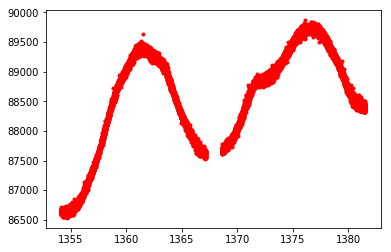

In [35]:
#Open and view columns in lightcurve extension
lchdu = fits.open(lcfiles[0])
#fits.info(lcfiles[0])

#Open and view columns in lightcurve extension
lcdata = lchdu[1].data
print(lchdu[1].columns)
#plt.plot(lcdata['TIME'], lcdata['SAP_FLUX'], 'k.')
plt.plot(lcdata['TIME'], lcdata['PDCSAP_FLUX'], 'r.')

(13, 11)

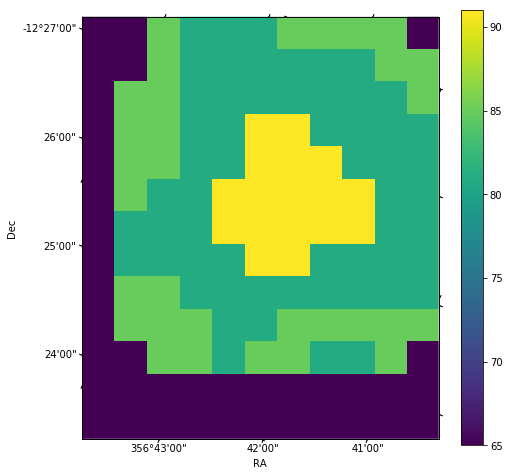

In [7]:
plt.figure(figsize = (8,8))

plt.subplot(111, projection=wcs)
plt.imshow(pixdata, vmin = np.percentile(pixdata,0), vmax = np.percentile(pixdata, 100), 
           origin = "lower", cmap='viridis')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()
pixdata.shape

In [44]:
outputfile = 'tess_2min_times.csv'
with open(outputfile, 'w') as of:
    of.write('TICID,ra,dec,time\n')
    for i, lcfile in enumerate(lcfiles):
        try:
            with fits.open(lcfile, mode = "readonly") as hdulist:
                metadata = hdulist[0].header
                ticid = metadata['TICID']
                lcmeta = hdulist[1].header
                lcdata = hdulist[1].data
                times = np.copy(lcdata['TIME'])
                pixmeta = hdulist[2].header
                ra = pixmeta['CRVAL1']
                dec = pixmeta['CRVAL2']
                for time in times:
                    of.write('%d,%f,%f,%f\n' % (ticid, ra, dec, time))
                of.flush()
        except:
            print("problem with %s" % lcfile)

problem with /epyc/data/tess/sector002/tess2018234235059-s0002-0000000005641875-0121-s_lc.fits
problem with /epyc/data/tess/sector002/tess2018234235059-s0002-0000000032035258-0121-s_lc.fits
problem with /epyc/data/tess/sector002/tess2018234235059-s0002-0000000070785900-0121-s_lc.fits
problem with /epyc/data/tess/sector002/tess2018234235059-s0002-0000000160196600-0121-s_lc.fits
problem with /epyc/data/tess/sector002/tess2018234235059-s0002-0000000183587877-0121-s_lc.fits
problem with /epyc/data/tess/sector002/tess2018234235059-s0002-0000000232075203-0121-s_lc.fits
problem with /epyc/data/tess/sector002/tess2018234235059-s0002-0000000260507093-0121-s_lc.fits
problem with /epyc/data/tess/sector002/tess2018234235059-s0002-0000000350621525-0121-s_lc.fits


In [42]:
ti = pd.read_csv(outputfile)

In [43]:
ti[0:5]

,TICID,ra,dec,time
0,2835867,356.717429,-12.437118,1354.108010
1,2835867,356.717429,-12.437118,1354.109398
2,2835867,356.717429,-12.437118,1354.110787
3,2835867,356.717429,-12.437118,1354.112176
4,2835867,356.717429,-12.437118,1354.113565
